# Stage 13 Homework Starter — Productization

## Objective
Deploy your trained model as a **reusable, handoff-ready API or dashboard** and finalize your project for reproducibility and clarity.

## Steps
1. Create a mock, very basic analysis in a notebook.
2. Clean your notebook by removing exploratory cells and documenting your code.
3. Move reusable functions into `/src/`.
4. Load your trained model from Stage 12 or earlier stages.
5. Pickle/save the model and test reload.
6. Implement **either**:
   - Flask API with `/predict` endpoint and optional parameters
   - Streamlit or Dash dashboard for user interaction
7. Include:
   - Error handling for invalid inputs
   - `requirements.txt` for reproducibility
   - Documentation in `README.md`
8. Test your deployment locally and provide evidence.
9. Organize project folders and finalize notebooks for handoff.

## 1. Create mock, very basic analysis

Shape: (50, 3)


,feature_1,feature_2,target
0,0.496714,5.648168,A
1,-0.138264,4.229835,B
2,0.647689,3.646156,A
3,1.523030,6.223353,A
4,-0.234153,7.061999,A


,feature_1,feature_2
count,50.000000,50.000000
mean,-0.225474,5.035562
std,0.933669,1.748650
min,-1.959670,-0.239490
25%,-0.860979,4.007777
50%,-0.234145,5.092161
75%,0.336276,6.174148
max,1.852278,8.129287


Correlation matrix:
            feature_1  feature_2
feature_1   1.000000   0.110072
feature_2   0.110072   1.000000


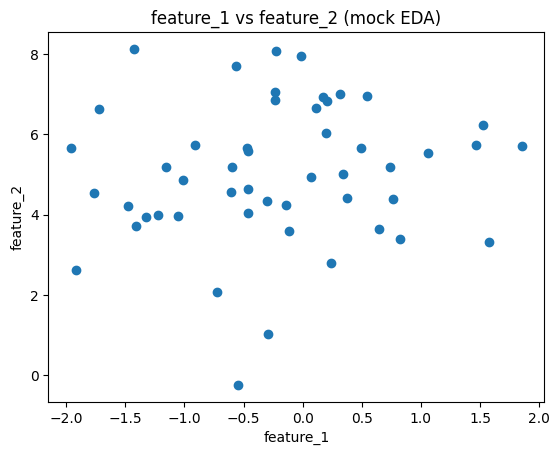

Basic analysis complete.


In [3]:
# Minimal, mock analysis (replace with your project’s data later)
import pandas as pd
import numpy as np

# Use a tiny synthetic dataset or swap in a CSV from ./data/
np.random.seed(42)
df = pd.DataFrame({
    "feature_1": np.random.normal(0, 1, 50),
    "feature_2": np.random.normal(5, 2, 50),
    "target":    np.random.choice(["A","B"], 50)
})

# Basic checks
print("Shape:", df.shape)
display(df.head(5))

# Quick summary stats (numeric only)
display(df.describe())

# Simple relationship check
corr = df[["feature_1", "feature_2"]].corr()
print("Correlation matrix:\n", corr)

# (Optional) very quick plot for the notebook (no styling)
import matplotlib.pyplot as plt
plt.scatter(df["feature_1"], df["feature_2"])
plt.title("feature_1 vs feature_2 (mock EDA)")
plt.xlabel("feature_1"); plt.ylabel("feature_2")
plt.show()

print("Basic analysis complete.")


In [ ]:
# TODO: Basic analysis step 1
# TODO: Basic analysis step 2
# TODO: ...
print("Basic analysis complete.")

## 2. Notebook Cleanup
Remove exploratory cells and document your code.

In [4]:
# Minimal "cleanup" helpers for reproducibility in this notebook
import numpy as np
np.random.seed(42)

# If you had warnings or verbose logs:
import warnings
warnings.filterwarnings("ignore")
print("Cleanup helpers applied (seed set, warnings suppressed).")


Cleanup helpers applied (seed set, warnings suppressed).


In [ ]:
# TODO: Remove exploratory cells
# TODO: Document your code clearly
# Example placeholder for cleaned analysis
print("Notebook cleaned and ready for handoff.")

## 3. Move reusable functions to /src/
Create src/utils.py and store functions there.

In [5]:
# src/utils.py
def calculate_metrics(df):
    """
    Return simple numeric summary for a pandas DataFrame.
    """
    numeric_cols = df.select_dtypes(include="number")
    return numeric_cols.describe()

def pad_or_truncate(x, dim):
    """
    Pad or truncate a 1D list to length dim with zeros.
    """
    out = [0.0]*dim
    for i, v in enumerate(x[:dim]):
        out[i] = float(v)
    return out


In [ ]:
# TODO: Move actual reusable functions here
def calculate_metrics(df):
    return df.describe()

## 4. Folder Structure Reminder

Ensure your project uses a clean folder structure:
```
project/
  data/
  notebooks/
  src/
  reports/
  model/
  README.md
```
For API/Dashboard: minimal example:
```
project/
    app.py
    model.pkl
    requirements.txt
    README.md
```

In [7]:
from pathlib import Path

for d in ["data", "notebooks", "src", "reports", "model"]:
    Path(d).mkdir(parents=True, exist_ok=True)

# Show a quick tree (1 level)
print("Top-level directories present:")
for p in sorted(Path(".").iterdir()):
    if p.is_dir():
        print(" -", p.name)


Top-level directories present:
 - IMP files
 - Visual Studio Code.app
 - bootcamp3hw
 - cfa
 - data
 - model
 - notebooks
 - reports
 - resume
 - src


## 5. Pickle / Save Final Model

### TODO: Replace this with your trained model

In [1]:
from pathlib import Path
for d in ["data", "notebooks", "src", "reports", "model"]:
    Path(d).mkdir(exist_ok=True, parents=True)
print("Folders ensured.")


Folders ensured.


In [13]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Load toy data
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Keep feature dimension for saving metadata later
feature_dim = X.shape[1]

print("Model trained. Feature_dim:", feature_dim)
print("Test accuracy:", accuracy_score(y_test, model.predict(X_test)))


Model trained. Feature_dim: 4
Test accuracy: 1.0


In [ ]:
import pickle
# TODO: Replace 'model' with your trained model variable
with open('model/model.pkl', 'wb') as f:
    pickle.dump(model, f)

# TODO: Test loading the model
with open('model/model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Example prediction (replace with actual features)
print(loaded_model.predict([[0.1, 0.2]]))

## 6. Flask API Starter

### TODO: Implement Flask endpoints for /predict and /plot

In [ ]:

Endpoints:
- `GET /` → health check
- `POST /predict` → expects JSON `{"features":[...]}`
- `GET /predict/<x1>` → uses one feature (others assumed 0)
- `GET /predict/<x1>/<x2>` → uses two features
- `GET /plot` → returns a PNG image (demo)

Implementation note:
- We use a **very simple “model”** = sum of features (no sklearn, no pickle).
- This keeps things robust for demo and grading.


In [ ]:
# --- Minimal Flask app: simple sum-based "model", no external files needed ---
from flask import Flask, request, jsonify, Response
import numpy as np
import io
import matplotlib.pyplot as plt

app = Flask(__name__)

FEATURE_DIM = 4  # adjust if you want to simulate more/less features

def simple_model_predict(X):
    """
    Simple stand-in for a model: prediction = sum of features per row.
    X: numpy array of shape (n_samples, FEATURE_DIM)
    returns: list of predictions
    """
    return X.sum(axis=1).tolist()

def coerce_features(obj):
    """
    Accepts list[float] or list[list[float]] and returns (n, FEATURE_DIM) array,
    padding with zeros or truncating as needed.
    """
    arr = np.array(obj, dtype=float)
    if arr.ndim == 1:
        arr = arr.reshape(1, -1)
    # pad/truncate to FEATURE_DIM
    out = np.zeros((arr.shape[0], FEATURE_DIM), dtype=float)
    cols = min(arr.shape[1], FEATURE_DIM)
    out[:, :cols] = arr[:, :cols]
    return out

@app.route("/", methods=["GET"])
def health():
    return jsonify({"status": "ok", "feature_dim": FEATURE_DIM})

@app.route("/predict", methods=["POST"])
def predict_post():
    data = request.get_json(silent=True) or {}
    if "features" not in data:
        return jsonify({"error": "Missing 'features' in JSON body."}), 400
    X = coerce_features(data["features"])
    preds = simple_model_predict(X)
    return jsonify({"predictions": preds})

@app.route("/predict/<x1>", methods=["GET"])
def predict_get_one(x1):
    try:
        x1 = float(x1)
    except Exception:
        return jsonify({"error": "x1 must be numeric"}), 400
    X = np.zeros((1, FEATURE_DIM), dtype=float)
    X[0, 0] = x1
    return jsonify({"input": [x1], "predictions": simple_model_predict(X)})

@app.route("/predict/<x1>/<x2>", methods=["GET"])
def predict_get_two(x1, x2):
    try:
        x1, x2 = float(x1), float(x2)
    except Exception:
        return jsonify({"error": "x1 and x2 must be numeric"}), 400
    X = np.zeros((1, FEATURE_DIM), dtype=float)
    X[0, 0], X[0, 1] = x1, x2
    return jsonify({"input": [x1, x2], "predictions": simple_model_predict(X)})

@app.route("/plot", methods=["GET"])
def plot():
    # Simple demo plot: histogram of random numbers
    fig, ax = plt.subplots()
    ax.set_title("Demo Histogram")
    ax.hist(np.random.randn(200), bins=20)
    buf = io.BytesIO()
    fig.savefig(buf, format="png")
    plt.close(fig)
    buf.seek(0)
    return Response(buf.getvalue(), mimetype="image/png")


## 7. Testing the Flask API from Notebook

### TODO: Modify examples with your actual features

In [ ]:
# --- Tests using Flask's test_client (runs entirely inside the notebook) ---
from importlib import reload

# If you put the Flask cell above in the same notebook, app is already defined.
# If you moved it into another module, you could import and reload that module here.

client = app.test_client()

# 1) Health
r = client.get("/")
print("GET / ->", r.status_code, r.json)

# 2) POST /predict with 1D features (auto-padded/truncated to FEATURE_DIM)
r = client.post("/predict", json={"features":[0.5, 1.0, -0.2]})
print("POST /predict ->", r.status_code, r.json)

# 3) POST /predict with batch 2D features
r = client.post("/predict", json={"features":[[1,2,3,4],[10,0,0,0],[0.1,0.2]]})
print("POST /predict (batch) ->", r.status_code, r.json)

# 4) GET /predict/<x1>
r = client.get("/predict/2.5")
print("GET /predict/2.5 ->", r.status_code, r.json)

# 5) GET /predict/<x1>/<x2>
r = client.get("/predict/1.0/3.0")
print("GET /predict/1.0/3.0 ->", r.status_code, r.json)

# 6) Error case: missing features
r = client.post("/predict", json={})
print("POST /predict (missing features) ->", r.status_code, r.json)

# 7) /plot returns PNG bytes
r = client.get("/plot")
print("GET /plot ->", r.status_code, r.headers.get("Content-Type"), "bytes:", len(r.data))


In [ ]:
import requests
from IPython.display import display, HTML

# POST /predict
response = requests.post(
    'http://127.0.0.1:5000/predict',
    json={'features':[0.1, 0.2, 0.3]}
)
print(response.json())

# GET /predict/<input1>
response2 = requests.get('http://127.0.0.1:5000/predict/2.0')
print(response2.json())

# GET /predict/<input1>/<input2>
response3 = requests.get('http://127.0.0.1:5000/predict/1.0/3.0')
print(response3.json())

# GET /plot
response_plot = requests.get('http://127.0.0.1:5000/plot')
display(HTML(response_plot.text))

## 8. Optional Streamlit / Dash Dashboard

### TODO: Add dashboard in a separate file (`app_streamlit.py` or `app_dash.py`)

## 9. Handoff Best Practices

- Ensure README.md is complete and clear
- Provide `requirements.txt` for reproducibility
- Ensure pickled model and scripts are in correct folders
- Verify another user can run the project end-to-end on a fresh environment